<a href="https://colab.research.google.com/github/JanePer/AI---PORTFOLIO/blob/main/Task9_(Pro)_%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Определение мошеннических операций

**1. Импорт библиотек и загрузка базы данных**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import os
import time, random
from google.colab import files
from google.colab import drive
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Reshape, concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv2DTranspose, Activation, MaxPooling2D, Conv2D #Базовые слои
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist, fashion_mnist # загружаем готовые базы mnist
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import StandardScaler

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv") # читаем базу
df.head() # выводим первые пять строк

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Удаляем столбец со временем
data = df.drop(['Time'], axis=1)
# Нормализуем столбец с суммой транзакции
scaller=StandardScaler()
data['Amount']=scaller.fit_transform(data['Amount'].values.reshape(-1,1))

In [ ]:
frauds=data[data['Class']==1] # записываем мошеннические операции
normal=data[data['Class']==0] # записываем нормальные операции
print(frauds.shape)
print(normal.shape)

(492, 30)
(284315, 30)


In [ ]:
RANDOM_SEED = 42 # задаем случайное значение
# берём нормальные операции и разбиваем на train_test(только 'X')
x_train, x_test = train_test_split(normal, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
# Удаляем класс в обучающем наборе данных
x_train = x_train.drop(['Class'], axis=1)
# Добавляем все мошеннические транзакции в тестовый набор данных
x_test = pd.concat([x_test, frauds])
# Делаем метки для тестового набора данных
y_test = x_test['Class']
# Удаляем класс у тестового набора данных
x_test = x_test.drop(['Class'], axis=1)
# Преобразуем данные в массивы numpy
x_train = x_train.values
x_test = np.array(x_test)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(227452, 29)
(57355, 29)
(57355,)


In [ ]:
def creditcardAutoencoder(): # объявляем автокодировщик для определения мошенич.транзакций
  dataSize = x_train.shape[1] # берём размеры X_train по второй оси(30)
  dataInput = Input(shape=(dataSize, )) # задаем эти размеры как входные в сеть
  
  x = Dense(200, activation='relu')(dataInput)
  x = Dense(100, activation='relu')(x)
  x = Dense(dataSize, activation='linear')(x) 
  
  autoencoder = Model(inputs=dataInput, outputs=x) # собрали модель 
  
  autoencoder.compile(optimizer='Adam', loss='mse') # компилируем модель также, с выбором оптимайзера и среднеквадратичной ошибки
  
  return autoencoder 

In [ ]:
model = creditcardAutoencoder()
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
dense_19 (Dense)             (None, 200)               6000      
_________________________________________________________________
dense_20 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_21 (Dense)             (None, 29)                2929      
Total params: 29,029
Trainable params: 29,029
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, x_train, epochs=100, batch_size=128) # загружаем данные в модель(X_train'ы) и обучаем

Epoch 1/100
1777/1777 [==============================] - 4s 2ms/step - loss: 0.0373
Epoch 2/100
1777/1777 [==============================] - 4s 2ms/step - loss: 0.0053
Epoch 3/100
1777/1777 [==============================] - 4s 2ms/step - loss: 0.0032
Epoch 4/100
1777/1777 [==============================] - 4s 2ms/step - loss: 0.0024
Epoch 5/100
1777/1777 [==============================] - 4s 2ms/step - loss: 0.0022
Epoch 6/100
1777/1777 [==============================] - 4s 2ms/step - loss: 0.0014
Epoch 7/100
1777/1777 [==============================] - 4s 2ms/step - loss: 0.0018
Epoch 8/100
1777/1777 [==============================] - 4s 2ms/step - loss: 0.0015
Epoch 9/100
1777/1777 [==============================] - 4s 2ms/step - loss: 0.0012
Epoch 10/100
1777/1777 [==============================] - 4s 2ms/step - loss: 0.0011
Epoch 11/100
1777/1777 [==============================] - 4s 2ms/step - loss: 0.0014
Epoch 12/100
1777/1777 [==============================] - 4s 2ms/step - lo

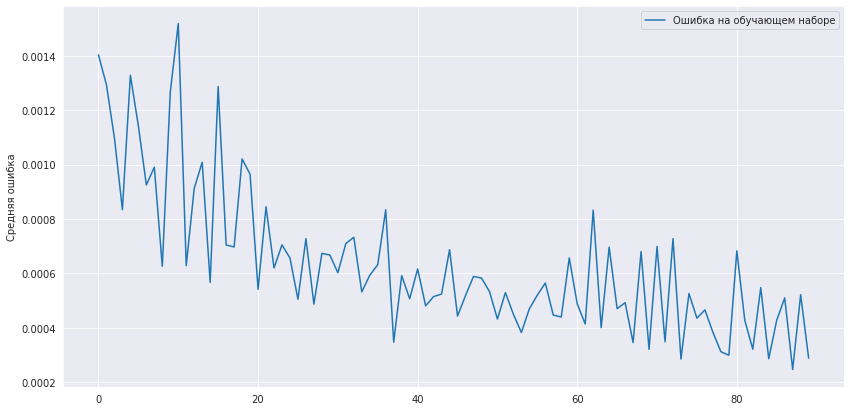

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][10:], label='Ошибка на обучающем наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(x_test) # делаем предсказание по X_test

In [ ]:
mse = np.mean(np.power(x_test - predictions, 2), axis=1) # определяем среднеквадратичную ошибку по X_test и предсказанием по X_test

In [ ]:
mse_normal = mse[y_test.values == 0] # среднеквадратичная ошибка на нормальных операциях
mse_frauds = mse[y_test.values == 1] # среднеквадратичная ошибка на мошеннических операциях

In [ ]:
print("Средняя ошибка нормальных транзакций:", round(sum(mse_normal) / len(mse_normal),4)) # среднюю ошибку
print("Средняя ошибка мошеннических транзакций:", round(sum(mse_frauds) / len(mse_frauds),4)) # среднюю ошибку

print("Минимальная ошибка нормальных транзакций:", round(min(mse_normal),4)) #найдем минимальную среднеквадратичную ошибку на нормальных операциях
print("Максимальная ошибка нормальных транзакций:", round(max(mse_normal),4)) #найдем максимальную среднеквадратичную ошибку на нормальных операциях

print("Минимальная ошибка мошеннических транзакций:", round(min(mse_frauds),4)) #найдем минимальную среднеквадратичную ошибку на мошеннических операциях
print("Максимальная ошибка мошеннических транзакций:", round(max(mse_frauds),4)) #найдем максимальную среднеквадратичную ошибку на мошеннических операциях

Средняя ошибка нормальных транзакций: 0.0002
Средняя ошибка мошеннических транзакций: 1.155
Минимальная ошибка нормальных транзакций: 0.0
Максимальная ошибка нормальных транзакций: 0.7669
Минимальная ошибка мошеннических транзакций: 0.0
Максимальная ошибка мошеннических транзакций: 48.9366


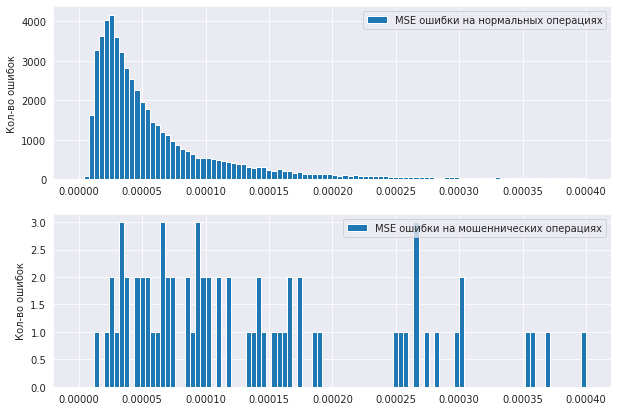

In [ ]:
fig=plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.hist(mse_normal, label='MSE ошибки на нормальных операциях', bins=100, range=(0,0.0004))
ax2.hist(mse_frauds, label='MSE ошибки на мошеннических операциях', bins=100, range=(0,0.0004))
ax1.set_ylabel('Кол-во ошибок')
ax2.set_ylabel('Кол-во ошибок')
ax1.legend()
ax2.legend()
plt.show()

In [ ]:
def getAccByBias(bias): # функция будет принимать какое то пороговое значение
  isNormal = mse_normal < bias # если ошибка меньше порога - то транзакция нормальная
  isFrauds = mse_frauds > bias # если ошибка больше порога - то транзакция мошенническая

  accNormal = sum(isNormal) / len(isNormal) # вычисляем процент нормальных операций
  accFaruds = sum(isFrauds) / len(isFrauds) # вычисляем процент мошеннических операций

  print("Распознано нормальных транзакций: ", round(100*accNormal), "%", sep="")
  print("Распознано мошеннических транзакций: ", round(100*accFaruds), "%", sep="")
  print("Средняя точность распознавания: ", round(50*(accNormal + accFaruds)), "%", sep="")

In [ ]:
getAccByBias(0.00035) # выведем данные по распознаванию с конкретным пороговым значением

Распознано нормальных транзакций: 96%
Распознано мошеннических транзакций: 87%
Средняя точность распознавания: 91%


- 1) при котором все мошеннические транзакции будут пойманы = min(mse_frauds) = 0.000012
- 2) “оптимальный порог” - на пересечении распределений = 0.00035
- 3) при котором ни одна нормальная транзакция не будет распознана, как мошенническая = max(mse_normal) = 0.77